In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew,norm
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/PROYECTO_TRADING/BASES_DE_DATOS/DATOS_CSV/AL30_COMPLETE_TASAS.csv")

In [3]:
time_series = pd.DataFrame(columns=['date','spread'])
# modifiique los nombres así era más claro

#APLICAR EXPONENTE HURST
data["SPREAD_COLOCAR_PLAZO_CERCANO"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)
data["SPREAD_COLOCAR_PLAZO_LEJANO"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)

data["SPREAD_TOMAR_PLAZO_CERCANO"] = (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100) - data["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]
data["SPREAD_TOMAR_PLAZO_LEJANO"] = (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100) - data["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]

data_general=data[["caucion_a_un_dia_ultimo_trade_tasa","SPREAD_COLOCAR_PLAZO_CERCANO","SPREAD_COLOCAR_PLAZO_LEJANO","SPREAD_TOMAR_PLAZO_CERCANO","SPREAD_TOMAR_PLAZO_LEJANO"]]
data_total=data


threshold_arbitrage=0

for index, row in data_general.iterrows():
    #Elegimos el mejor spread para colocar y tomar
    if  row["SPREAD_COLOCAR_PLAZO_CERCANO"] > row["SPREAD_COLOCAR_PLAZO_LEJANO"]:
         spread_colocar = row["SPREAD_COLOCAR_PLAZO_CERCANO"]
    else:
        spread_colocar = row["SPREAD_COLOCAR_PLAZO_LEJANO"]

    if row["SPREAD_TOMAR_PLAZO_CERCANO"] < row["SPREAD_TOMAR_PLAZO_LEJANO"]:
        spread_tomar = row["SPREAD_TOMAR_PLAZO_CERCANO"]

    else:
        spread_tomar = row["SPREAD_TOMAR_PLAZO_LEJANO"]

    # CASO NO PASA NADA
    if row["SPREAD_COLOCAR_PLAZO_CERCANO"] < threshold_arbitrage and row["SPREAD_COLOCAR_PLAZO_LEJANO"] < threshold_arbitrage  and row["SPREAD_TOMAR_PLAZO_CERCANO"] > threshold_arbitrage and row["SPREAD_TOMAR_PLAZO_LEJANO"] > threshold_arbitrage:

        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[0]})],ignore_index=True)

    elif spread_colocar > 0 and spread_tomar < 0:

        if spread_colocar > -spread_tomar:
            
            time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_colocar]})],ignore_index=True)
        
        else:

            time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_tomar]})],ignore_index=True)

    elif spread_colocar > 0:

        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_colocar]})],ignore_index=True)

    elif spread_tomar < 0:

        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_tomar]})],ignore_index=True)
    
    else:

        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[0]})],ignore_index=True)

In [80]:
lista = []
count = 0
for index, data_point in enumerate(time_series["spread"]):
    if data_point < 0:
        count += 1
        lista.append((index, data_point))

In [81]:
datos_filtrados=pd.DataFrame(lista)
datos_filtrados["indice_trade"]= datos_filtrados.iloc[:, 0]
datos_filtrados["spread"]= datos_filtrados.iloc[:, 1]
datos_filtrados=datos_filtrados[["indice_trade","spread"]]

# DATOS COMPLETOS

<Axes: >

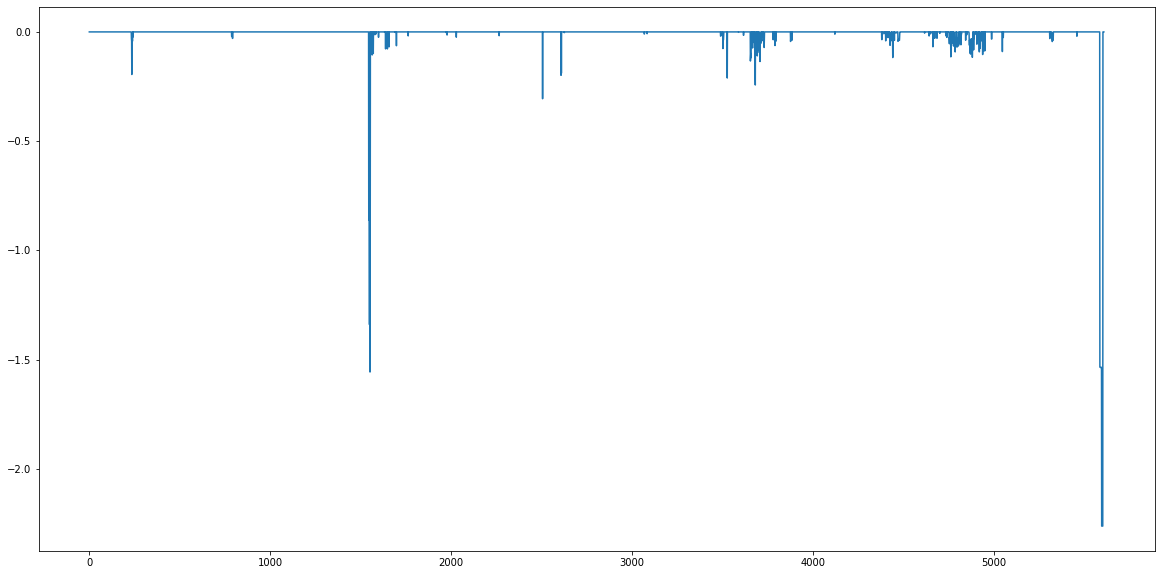

In [82]:
time_series["spread"].plot(figsize=(20,10))

# DATOS FILTRADOS

<Axes: >

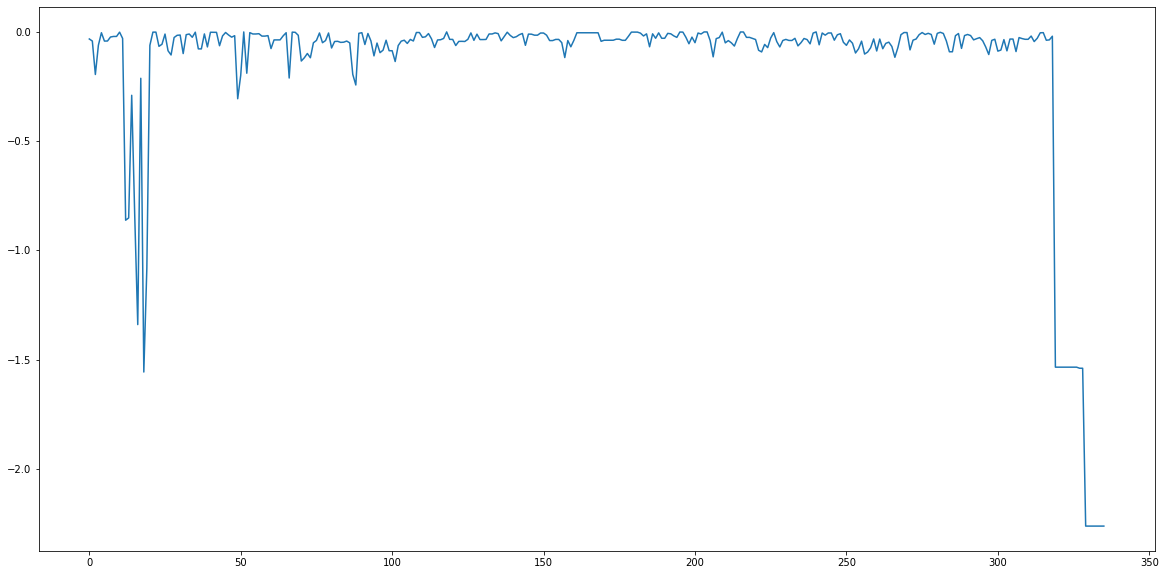

In [83]:
datos_filtrados["spread"].plot(figsize=(20,10))

In [84]:
filtered_df2 = data.loc[datos_filtrados["indice_trade"].values]
filtered_df2.drop(columns="caucion_a_un_dia_ultimo_trade_monto",inplace=True)
filtered_df2.drop(columns="time",inplace=True)

data=filtered_df2

data["SPREAD_COLOCAR_PLAZO_CERCANO"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)
data["SPREAD_COLOCAR_PLAZO_LEJANO"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)

data["SPREAD_TOMAR_PLAZO_CERCANO"] = (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)  - data["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]
data["SPREAD_TOMAR_PLAZO_LEJANO"] = (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)  - data["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]

data["SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO"]=data["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-data["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] 
data["SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO"]=data["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-data["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] 



In [85]:
spread_regresion=datos_filtrados["spread"]

data_regr_1=data[["SPREAD_COLOCAR_PLAZO_CERCANO","SPREAD_COLOCAR_PLAZO_LEJANO","SPREAD_TOMAR_PLAZO_CERCANO","SPREAD_TOMAR_PLAZO_LEJANO","SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO","SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO"]]
data_regr_2=data[["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA","caucion_a_un_dia_ultimo_trade_tasa"]]

In [86]:
len(spread_regresion)

336

In [87]:
len(data_regr_1)

336

In [88]:
len(data_regr_2)

336

# COMPARACIONES REGRESIONES LINEALES DATOS FLITRADOS

**HAREMOS 2 PRUEBAS, UNA CON LAS SERIES DE TIEMPO SIN SER MODIFICADAS, O SEA DIRECTAMENTE COMO VIENEN EN EL DATA SET Y OTRA MANEJANDO SPREADS PARA VER QUE NOS CONVIENE MAS**

In [89]:
X = data_regr_1
y= spread_regresion

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

feature_importance = pd.Series(model.coef_, index=X.columns)
print("Feature importance (coefficients):\n", feature_importance)

R2 score: 0.9826163300332252
Mean Squared Error: 0.0026422539603306364
Feature importance (coefficients):
 SPREAD_COLOCAR_PLAZO_CERCANO             0.185207
SPREAD_COLOCAR_PLAZO_LEJANO              0.334536
SPREAD_TOMAR_PLAZO_CERCANO               0.659565
SPREAD_TOMAR_PLAZO_LEJANO                0.803449
SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO   -0.149329
SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO      0.143885
dtype: float64


In [94]:
import numpy as np

# Set the window size
n = 100

# Initialize empty lists to store results
r2_scores = []
mse_scores = []
feature_importances = []

# Loop through the data with a step size of n
for i in range(0, len(X) - n + 1, n):
    # Split the data into a rolling window
    X_window = X.iloc[i:i+n, :]
    y_window = y[i:i+n]
    
    # Split the window into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_window, y_window, test_size=0.3, random_state=42)
    
    # Fit a linear regression model on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model on the testing data
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store the results for this window
    r2_scores.append(r2)
    mse_scores.append(mse)
    feature_importances.append(model.coef_)
    
# Calculate the mean scores across all windows
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)

# Concatenate the feature importances from all windows into a single DataFrame
feature_importance_df = pd.concat([pd.Series(x, index=X.columns) for x in feature_importances], axis=1)

feature_importance_df

,0,1,2
SPREAD_COLOCAR_PLAZO_CERCANO,-0.067998,1.695865,0.637520
SPREAD_COLOCAR_PLAZO_LEJANO,0.011404,1.273017,0.713182
SPREAD_TOMAR_PLAZO_CERCANO,0.371956,1.470119,0.920144
SPREAD_TOMAR_PLAZO_LEJANO,0.577467,1.839731,0.911191
SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO,-0.079402,0.422848,-0.075661
SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO,0.205511,0.369611,-0.008953


In [95]:
X = data_regr_2
y= spread_regresion

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

feature_importance = pd.Series(model.coef_, index=X.columns)
print("Feature importance (coefficients):\n", feature_importance)

R2 score: 0.9824633001533534
Mean Squared Error: 0.002665513939777628
Feature importance (coefficients):
 COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA    0.000163
COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA     0.502778
TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA     -0.542825
TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA      -0.910536
caucion_a_un_dia_ultimo_trade_tasa          0.016970
dtype: float64


In [96]:
import numpy as np

# Set the window size
n = 100

# Initialize empty lists to store results
r2_scores = []
mse_scores = []
feature_importances = []

# Loop through the data with a step size of n
for i in range(0, len(X) - n + 1, n):
    # Split the data into a rolling window
    X_window = X.iloc[i:i+n, :]
    y_window = y[i:i+n]
    
    # Split the window into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_window, y_window, test_size=0.3, random_state=42)
    
    # Fit a linear regression model on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model on the testing data
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store the results for this window
    r2_scores.append(r2)
    mse_scores.append(mse)
    feature_importances.append(model.coef_)
    
# Calculate the mean scores across all windows
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)

# Concatenate the feature importances from all windows into a single DataFrame
feature_importance_df = pd.concat([pd.Series(x, index=X.columns) for x in feature_importances], axis=1)

feature_importance_df

,0,1,2
COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA,-0.133511,2.117953,0.570820
COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA,0.041023,0.850216,0.788016
TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA,-0.109024,-1.100601,-0.928576
TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA,-0.805267,-2.208841,-0.909728
caucion_a_un_dia_ultimo_trade_tasa,-0.003565,0.003307,0.002942


# DATOS COMPLETOS REGRESION COMPARACION

# COMPARACION 2 REGRESIONES LINEALES

In [98]:
X = data_total[["SPREAD_COLOCAR_PLAZO_CERCANO","SPREAD_COLOCAR_PLAZO_LEJANO","SPREAD_TOMAR_PLAZO_CERCANO","SPREAD_TOMAR_PLAZO_LEJANO"]]
y= time_series["spread"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

feature_importance = pd.Series(model.coef_, index=X.columns)
print("Feature importance (coefficients):\n", feature_importance)

R2 score: 0.5156796038452763
Mean Squared Error: 0.007054179570535932
Feature importance (coefficients):
 SPREAD_COLOCAR_PLAZO_CERCANO    0.016599
SPREAD_COLOCAR_PLAZO_LEJANO     0.193631
SPREAD_TOMAR_PLAZO_CERCANO     -0.118334
SPREAD_TOMAR_PLAZO_LEJANO       0.422550
dtype: float64


In [101]:
import numpy as np

# Set the window size
n = 1000

# Initialize empty lists to store results
r2_scores = []
mse_scores = []
feature_importances = []

# Loop through the data with a step size of n
for i in range(0, len(X) - n + 1, n):
    # Split the data into a rolling window
    X_window = X.iloc[i:i+n, :]
    y_window = y[i:i+n]
    
    # Split the window into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_window, y_window, test_size=0.3, random_state=42)
    
    # Fit a linear regression model on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model on the testing data
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store the results for this window
    r2_scores.append(r2)
    mse_scores.append(mse)
    feature_importances.append(model.coef_)
    
# Calculate the mean scores across all windows
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)

# Concatenate the feature importances from all windows into a single DataFrame
feature_importance_df = pd.concat([pd.Series(x, index=X.columns) for x in feature_importances], axis=1)
feature_importance_df


,0,1,2,3,4
SPREAD_COLOCAR_PLAZO_CERCANO,-0.001423,0.237046,0.073893,0.002581,0.427370
SPREAD_COLOCAR_PLAZO_LEJANO,-0.003673,0.049848,-0.001580,0.014596,0.195290
SPREAD_TOMAR_PLAZO_CERCANO,-0.001058,-0.151884,-0.024194,0.035059,0.262146
SPREAD_TOMAR_PLAZO_LEJANO,-0.000239,0.552755,0.134842,0.002677,0.541371


In [56]:
X = data_total[["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA","caucion_a_un_dia_ultimo_trade_tasa"]]
y= time_series["spread"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

feature_importance = pd.Series(model.coef_, index=X.columns)
print("Feature importance (coefficients):\n", feature_importance)

R2 score: 0.5168871273175752
Mean Squared Error: 0.00703659185901921
Feature importance (coefficients):
 COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA    0.032134
COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA     0.194583
TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA      0.122647
TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA      -0.437322
caucion_a_un_dia_ultimo_trade_tasa         -0.002934
dtype: float64


In [102]:
import numpy as np

# Set the window size
n = 1000

# Initialize empty lists to store results
r2_scores = []
mse_scores = []
feature_importances = []

# Loop through the data with a step size of n
for i in range(0, len(X) - n + 1, n):
    # Split the data into a rolling window
    X_window = X.iloc[i:i+n, :]
    y_window = y[i:i+n]
    
    # Split the window into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_window, y_window, test_size=0.3, random_state=42)
    
    # Fit a linear regression model on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model on the testing data
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store the results for this window
    r2_scores.append(r2)
    mse_scores.append(mse)
    feature_importances.append(model.coef_)
    
# Calculate the mean scores across all windows
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)

# Concatenate the feature importances from all windows into a single DataFrame
feature_importance_df = pd.concat([pd.Series(x, index=X.columns) for x in feature_importances], axis=1)
feature_importance_df

,0,1,2,3,4
SPREAD_COLOCAR_PLAZO_CERCANO,-0.001423,0.237046,0.073893,0.002581,0.427370
SPREAD_COLOCAR_PLAZO_LEJANO,-0.003673,0.049848,-0.001580,0.014596,0.195290
SPREAD_TOMAR_PLAZO_CERCANO,-0.001058,-0.151884,-0.024194,0.035059,0.262146
SPREAD_TOMAR_PLAZO_LEJANO,-0.000239,0.552755,0.134842,0.002677,0.541371
